In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/random-linear-regression/train.csv
/kaggle/input/random-linear-regression/test.csv


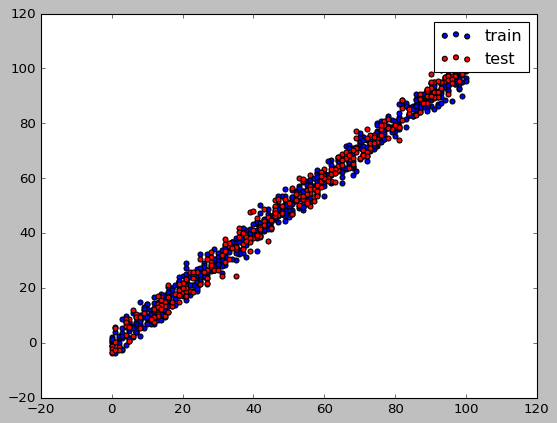

In [2]:
import matplotlib.pyplot as plt
plt.style.use("classic")

train_data = pd.read_csv("/kaggle/input/random-linear-regression/train.csv")
train_data = train_data.dropna()
X_train = train_data["x"]
y_train = train_data["y"]

test_data = pd.read_csv("/kaggle/input/random-linear-regression/test.csv")
test_data = test_data.dropna()
X_test = test_data["x"]
y_test = test_data["y"]

plt.scatter(X_train, y_train, label="train")
plt.scatter(X_test, y_test, c="r", label="test")
plt.legend()

### Normal Equation

In [3]:
n = int(len(X_train.values))
X_b = np.c_[np.ones((len(X_train), 1)), X_train]

theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train.dropna().values)
theta

array([-0.10726546,  1.00065638])

In [4]:
y_pred = (X_test.values.reshape(-1,1).dot(theta.reshape(1,-1)))[:, 1]

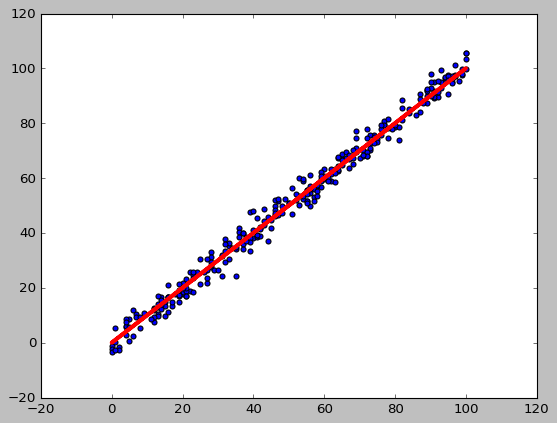

In [5]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c="r", lw=3.5)
plt.show()

#### Using MSE equation

In [6]:
MSE = 1/n * (sum((y_test - y_pred) ** 2))
MSE

4.021893629744813

### Compare Normal Equation to sklearn

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_regressor = LinearRegression()
linear_regressor.fit(X_train.values.reshape(-1,1), y_train.values.reshape(699,))
y_pred_sklearn = linear_regressor.predict(X_test.values.reshape(-1,1))

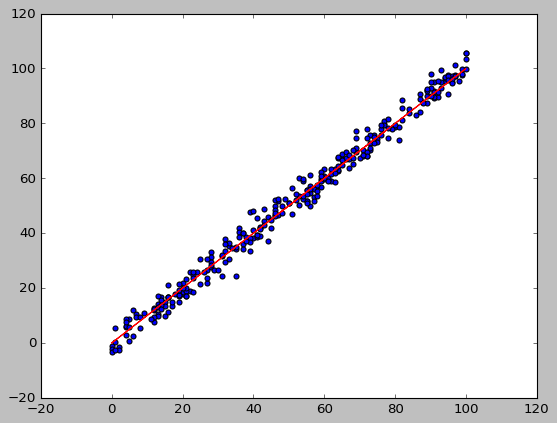

In [8]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_sklearn, c="r", ms=3.5)
plt.show()

In [9]:
MSE_sklearn = mean_squared_error(y_test, y_pred_sklearn)
MSE_sklearn

9.432922192039305

In [10]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# SGDRegressors from sklearn NEED pipelines!
regSGD = make_pipeline(StandardScaler(), SGDRegressor())
params = {"sgdregressor__learning_rate": ["constant", "optimal", "invscaling"]}
gridSearchSGD = GridSearchCV(regSGD, param_grid=params)
gridSearchSGD.fit(X_train.values.reshape(-1,1), y_train.values.reshape(699,))

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('sgdregressor', SGDRegressor())]),
             param_grid={'sgdregressor__learning_rate': ['constant', 'optimal',
                                                         'invscaling']})

In [11]:
regSGD.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'sgdregressor', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'sgdregressor__alpha', 'sgdregressor__average', 'sgdregressor__early_stopping', 'sgdregressor__epsilon', 'sgdregressor__eta0', 'sgdregressor__fit_intercept', 'sgdregressor__l1_ratio', 'sgdregressor__learning_rate', 'sgdregressor__loss', 'sgdregressor__max_iter', 'sgdregressor__n_iter_no_change', 'sgdregressor__penalty', 'sgdregressor__power_t', 'sgdregressor__random_state', 'sgdregressor__shuffle', 'sgdregressor__tol', 'sgdregressor__validation_fraction', 'sgdregressor__verbose', 'sgdregressor__warm_start'])

In [12]:
gridSearchSGD.best_params_

{'sgdregressor__learning_rate': 'constant'}

In [13]:
regSGD = make_pipeline(StandardScaler(), SGDRegressor(learning_rate="invscaling"))
regSGD.fit(X_train.values.reshape(-1,1), y_train.values.reshape(699,))
y_predSGD = regSGD.predict(X_test.values.reshape(-1,1))
y_predSGD

array([ 76.98133487,  20.91263479,  21.91386158,  19.91140801,
        35.9310366 ,  14.90527407,  61.96293307,  95.00341704,
        19.91140801,   4.8930062 ,   3.89177941,  18.91018122,
        96.00464383,  61.96293307,  35.9310366 ,  14.90527407,
        64.96661343,  13.90404728,  86.99360274,  68.97152058,
        88.99605632,  50.94943841,  88.99605632,  26.91999552,
        97.00587062,  57.95802592,  78.98378845,  20.91263479,
        93.00096347,  26.91999552,  99.00832419,  30.92490266,
        32.92735624,  79.98501523,  27.9212223 ,  46.94453126,
        52.95189198,  68.97152058,  27.9212223 ,  32.92735624,
        90.99850989,  70.97397415,  49.94821162,  75.98010809,
         3.89177941,  36.93226339,  69.97274736,  67.97029379,
        39.93594375,  34.92980981,  94.00219025,  87.99482953,
        51.95066519,  30.92490266,  58.9592527 ,  -0.11312774,
        38.93471696,  63.96538664,  68.97152058,  56.95679913,
        12.9028205 ,  71.97520094,  75.98010809,  60.96

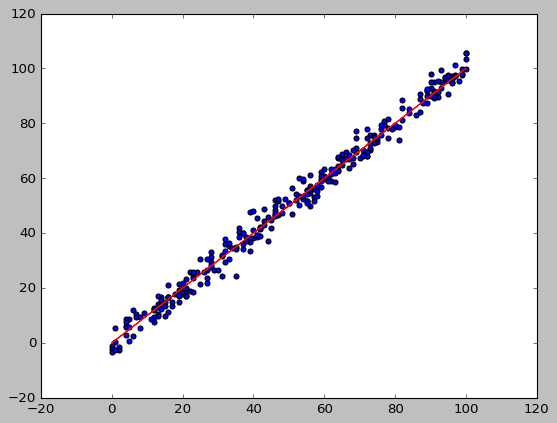

In [14]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_predSGD, c="r", ms=3.5)
plt.show()

In [15]:
MSE_SGD = mean_squared_error(y_test, y_predSGD)
MSE_SGD

9.405213209678086

In [16]:
class CustomRegression:
    
    def __init__(self, eta=0.0001, epochs=1000):
        self.theta = 0.1
        self.L = eta
        self.epochs = epochs
        self.n = len(X_train)
    
    # Compute the gradients with respect to theta
    def fit(self, X_train, y_train, GD="batch", **kwargs):
        
        if GD == "batch":
            self.n = len(X_train)
            
        elif GD == "SGD" or GD == "stochastic":
            self.n = 1
            
        elif GD == "mini-batch":
            self.n = 10
            
        elif GD == None:
            X_b = np.c_[np.ones((len(X_train), 1)), X_train]
            self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
            
        else:
            GD_params = ["'batch'", "'SGD' or 'stochastic'", "'mini-batch'", None]
            unidentifiedParamError = f"{GD} is not one of the GD methods available.\n"
            unidentifiedParamError += f"See the following list of GD paramaters available: {GD_params}"
            raise NameError(unidentifiedParamError)
        
        if GD is not None:
            for epoch in range(self.epochs):
                if GD == "batch":
                    gradients = 2/self.n * X_train.T.dot(X_train.dot(self.theta) - y_train)
                    self.theta = self.theta - self.L*gradients
                else:
                    randIDX = np.random.randint(0, len(X_train)-1, self.n)
                    gradients = 2/self.n * X_train.T[randIDX].dot(X_train[randIDX].dot(self.theta) - y_train[randIDX])
                    self.theta = self.theta - self.L*gradients
    
    # Return array of len(X_test) predict values
    def predict(self, X_test):
        return X_test.dot(self.theta)
        

In [17]:
regSGD = CustomRegression(eta=0.0001,epochs=750)
regSGD.fit(X_train.values, y_train.values, GD="stochastic")
predSGD = regSGD.predict(X_test.values)

In [18]:
regBatch = CustomRegression(eta=0.0001, epochs=100)
regBatch.fit(X_train.values, y_train.values, GD="batch")
predBatch = regBatch.predict(X_test.values)

In [19]:
regMini = CustomRegression(eta=0.0001, epochs=125)
regMini.fit(X_train.values, y_train.values, GD="mini-batch")
predMini = regMini.predict(X_test.values)

In [20]:
regNormal = CustomRegression()
regNormal.fit(X_train.values, y_train.values, GD=None)
predNormal = regNormal.predict(np.c_[np.ones((len(X_test.values), 1)), X_test.values])

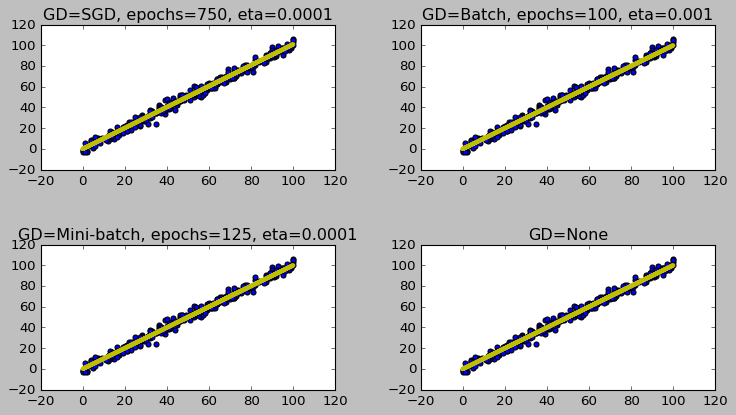

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 6))

ax1.set_title("GD=SGD, epochs=750, eta=0.0001")
ax1.scatter(X_test, y_test)
ax1.plot(X_test.values, predSGD, c="y", lw=4)

ax2.set_title("GD=Batch, epochs=100, eta=0.001")
ax2.scatter(X_test, y_test)
ax2.plot(X_test.values, predBatch, c="y", lw=4)

ax3.set_title("GD=Mini-batch, epochs=125, eta=0.0001")
ax3.scatter(X_test, y_test)
ax3.plot(X_test.values, predMini, c="y", lw=4)

ax4.set_title("GD=None")
ax4.scatter(X_test, y_test)
ax4.plot(X_test.values, predNormal, c="y", lw=4)

fig.tight_layout(pad=3)